In [1]:
!yes | conda install scrapy 

Fetching package metadata .........
Solving package specifications: ..........

Package plan for installation in environment /opt/conda/envs/python2:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libxslt-1.1.29             |                5         1.3 MB  conda-forge
    constantly-15.1.0          |           py27_0          11 KB
    cssselect-1.0.0            |           py27_0          23 KB  conda-forge
    hyperlink-17.1.1           |           py27_0          41 KB
    incremental-16.10.1        |           py27_0          26 KB
    lxml-3.8.0                 |           py27_0         3.3 MB  conda-forge
    pyasn1-0.3.2               |           py27_0          87 KB  conda-forge
    pydispatcher-2.0.5         |           py27_0          16 KB  conda-forge
    pympler-0.5                |           py27_0         219 KB  conda-forge
    queuelib-1.4.2             |          

In [2]:
import requests
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import pandas as pd

In [3]:
response = requests.get("http://usapl.liftingdatabase.com/competitions-view?id=1649")

html = response.text

In [4]:
result_records = []

events = ["Female - Junior", "Female - Master 1", "Female - Master 2", "Female - Master 3", "Female - Master 4",
         "Female - Open", "Female - Teen 1", "Female - Teen 2", "Female - Teen 3", "Male - Junior", "Male - Master 1",
         "Male - Master 2", "Male - Master 3", "Male - Master 4", "Male - Master 5", "Male - Open", "Male - Teen 1",
         "Male - Teen 2", "Male - Teen 3"] # update this as appropriate
current_event = False

for table_row in Selector(text=html).xpath("//table[@id='competition_view_results']/tbody/tr"):

    last_competition_type = table_row.xpath(".//th/text()").extract_first(default="None").strip()

    if last_competition_type.strip() in events: 
        current_event = last_competition_type
    
    row_data = table_row.xpath("./td/text()").extract()
    
    if len(row_data) > 0:
        result_records.append([current_event] + row_data)

# Then from here you could probably figure out which columns match to which offsets
df = pd.DataFrame(result_records, dtype='string')
df = df.applymap(lambda value: value.strip() if type(value) == unicode else value)



In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Male - Open,120+,-,1987,WI,161.98,-435,-435,-450,-340,-340,-350,-280,,,0,0.00,X
1,Female - Junior,-52,1.,1994,TX,47.03,147.5,155,-160,75,80,85,150,160,-167.5,400,537.72,None
2,Female - Junior,-52,2.,1997,TX,51.61,145,152.5,-160,-90,90,95,140,152.5,-157.5,400,501.56,X
3,Female - Junior,-57,1.,1994,WI,56.03,172.5,182.5,190,115,122.5,130,167.5,180,-190,500,588.05,X
4,Female - Junior,-63,1.,1994,VA,62.74,170,180,-185,110,115,-120.5,167.5,177.5,-185,472.5,509.02,None


In [83]:
#import unicodedata

In [161]:
#unicodedata.numeric()

In [6]:
df.shape

(259, 18)

In [7]:
df.columns = ['class', 'weight_class', 'rank', 'birth_year', 'state', 'weight', 'squat_1', 'squat_2', 'squat_3', 'bench_1', 
             'bench_2', 'bench_3', 'dl_1', 'dl_2', 'dl_3', 'total', 'score', 'drug'] 

In [8]:
df.drug = df.drug.map(lambda x: 1 if x == 'X' else 0)

In [9]:
def convert_numeric(val):
    if str(val).isdigit():
        val = float(str((val)))
        return val
    else: 
        return str(val)
    
df = df.applymap(convert_numeric)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 18 columns):
class           259 non-null object
weight_class    259 non-null object
rank            259 non-null object
birth_year      259 non-null float64
state           259 non-null object
weight          259 non-null object
squat_1         259 non-null object
squat_2         259 non-null object
squat_3         259 non-null object
bench_1         259 non-null object
bench_2         259 non-null object
bench_3         259 non-null object
dl_1            259 non-null object
dl_2            259 non-null object
dl_3            259 non-null object
total           259 non-null object
score           259 non-null object
drug            259 non-null float64
dtypes: float64(2), object(16)
memory usage: 36.5+ KB


In [13]:
import numpy as np
df = df.replace('', np.nan)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 18 columns):
class           259 non-null object
weight_class    259 non-null object
rank            259 non-null object
birth_year      259 non-null float64
state           259 non-null object
weight          259 non-null object
squat_1         259 non-null object
squat_2         258 non-null object
squat_3         255 non-null object
bench_1         257 non-null object
bench_2         254 non-null object
bench_3         250 non-null object
dl_1            254 non-null object
dl_2            250 non-null object
dl_3            245 non-null object
total           259 non-null object
score           259 non-null object
drug            259 non-null float64
dtypes: float64(2), object(16)
memory usage: 36.5+ KB


In [15]:
def floater(series):
    return pd.to_numeric(series, errors='ignore')

df = df.apply(floater)


In [17]:
gender = ['Male' if 'Male' in x else "Female" for x in df['class'].values]

In [18]:
df['gender'] = gender

In [19]:
df.groupby(('weight_class', 'gender'))['total'].mean()

weight_class  gender
-105          Male      754.916667
-120          Male      678.382353
-43           Female    285.000000
-47           Female    282.142857
-52           Female    320.062500
-53           Male      455.625000
-57           Female    336.916667
-59           Male      542.055556
-63           Female    405.166667
-66           Male      533.333333
-72           Female    442.962963
-74           Male      573.333333
-83           Male      632.272727
-84           Female    452.535714
-93           Male      603.695652
120+          Male      599.166667
84+           Female    440.909091
Name: total, dtype: float64

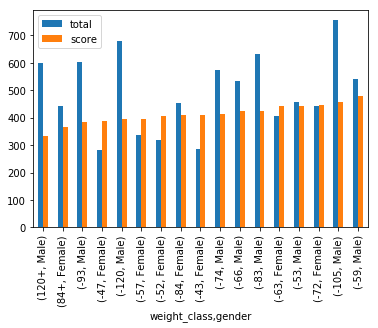

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

df.groupby(('weight_class', 'gender'))['total', 'score'].mean().sort_values("score").plot(kind='bar')
plt.show()

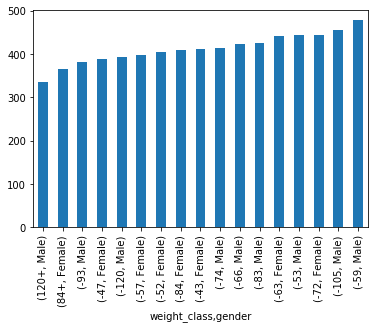

In [21]:
df.groupby(('weight_class', 'gender'))['score'].mean().sort_values().plot(kind='bar')
plt.show()

In [48]:
def men_wilks(x): 
    a=-216.0475144
    b=16.2606339
    c=-0.002388645
    d=-0.00113732
    e=7.01863E-06
    f=-1.291E-08
    bottom = a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5
    return float(500)/ bottom

In [49]:
def women_wilks(x): 
    a=594.31747775582
    b=-27.23842536447
    c=0.82112226871
    d=-0.00930733913
    e=4.731582E-05
    f=-9.054E-08
    bottom = a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5
    return float(500)/ bottom

In [28]:
powerlift_df = df.copy()

In [37]:
max_squat = []
max_bench = []
max_dl = []

for row in powerlift_df.iterrows():
    squat = max((row[1]['squat_1'], row[1]['squat_2'], row[1]['squat_3']))
    bench = max((row[1]['bench_1'], row[1]['bench_2'], row[1]['bench_3']))
    dl = max((row[1]['dl_1'], row[1]['dl_2'], row[1]['dl_3']))
    max_squat.append(squat)
    max_bench.append(bench)
    max_dl.append(dl)
    

powerlift_df['max_squat'] = max_squat
powerlift_df['max_bench'] = max_bench
powerlift_df['max_dl'] = max_dl

In [40]:
powerlift_df.drop([
    'squat_1', 'squat_2', 'squat_3', 'bench_1', 'bench_2', 'bench_3', 'dl_1', 'dl_2', 'dl_3'
], axis= 1, inplace=True)

In [44]:
powerlift_df = powerlift_df[
    (powerlift_df['max_squat'] > 0) & (powerlift_df['max_bench'] > 0) & (powerlift_df['max_dl'] > 0)
]

In [59]:
men = powerlift_df[(powerlift_df['gender'] == 'Male') & (powerlift_df['weight']< 180)]
women = powerlift_df[powerlift_df['gender'] == 'Female']

In [60]:
men.shape

(132, 13)

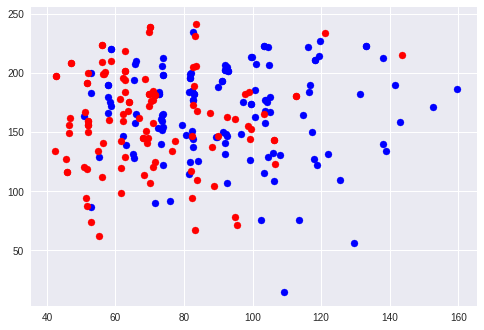

In [74]:
# Plot squat by wilks adjusted squat

x = men.weight
y = men_wilks(men.weight) * men.max_squat

w = women.weight
t = women_wilks(women.weight) * women.max_squat

plt.scatter(x, y, c='b')
plt.scatter(w, t, c='r')

In [75]:
print np.corrcoef(x, y)

print np.corrcoef(w, t)

[[ 1.         -0.00966301]
 [-0.00966301  1.        ]]
[[ 1.          0.03223812]
 [ 0.03223812  1.        ]]


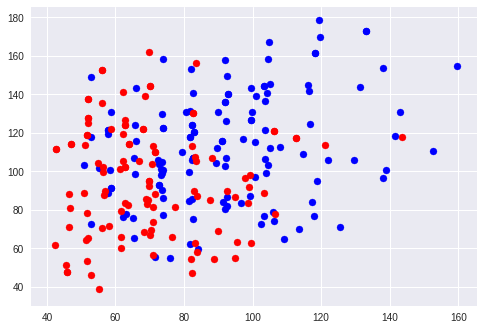

In [89]:
# Plot squat by wilks adjusted bench

x = men.weight
y = men_wilks(men.weight) * men.max_bench

w = women.weight
t = women_wilks(women.weight) * women.max_bench

plt.scatter(x, y, c='b')
plt.scatter(w, t, c='r')

In [90]:
print np.corrcoef(x, y)

print np.corrcoef(w, t)

[[ 1.        0.288617]
 [ 0.288617  1.      ]]
[[ 1.          0.01181255]
 [ 0.01181255  1.        ]]


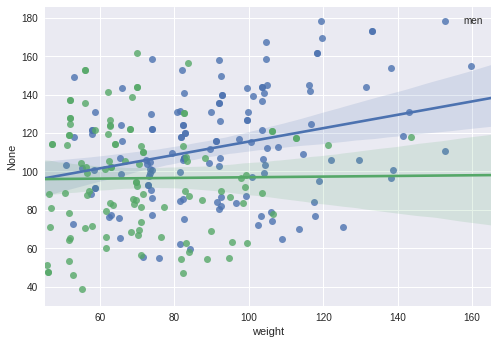

In [91]:
import seaborn as sns

sns.regplot(x, y, label='men')
sns.regplot(w, t)
plt.legend()

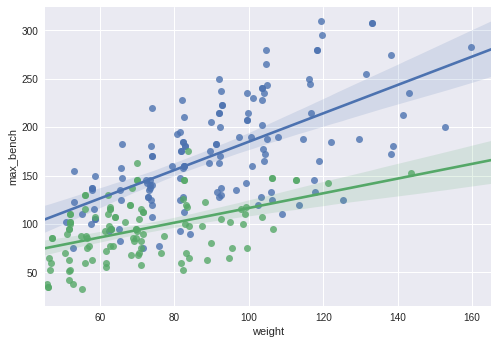

In [87]:

x = men.weight
y = men.max_bench

w = women.weight
t = women.max_bench

sns.regplot(x, y)
sns.regplot(w, t)

In [88]:
print np.corrcoef(x, y)

print np.corrcoef(w, t)

[[ 1.          0.62358372]
 [ 0.62358372  1.        ]]
[[ 1.          0.47550058]
 [ 0.47550058  1.        ]]


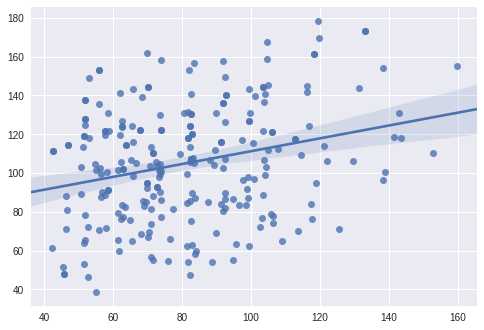

In [81]:
a = np.append(x, w)
b = np.append(y, t)

sns.regplot(a, b)

In [82]:
np.corrcoef(a, b)

array([[ 1.        ,  0.27137777],
       [ 0.27137777,  1.        ]])

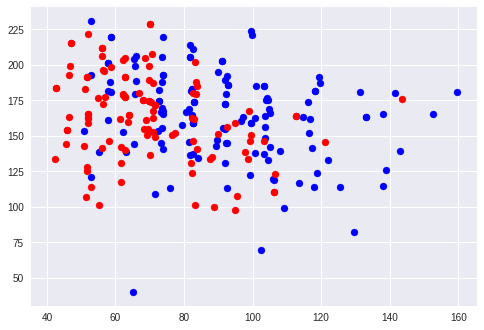

In [71]:
# Plot squat by wilks adjusted dl 

x = men.weight
y = men_wilks(men.weight) * men.max_dl

w = women.weight
t = women_wilks(women.weight) * women.max_dl

plt.scatter(x, y, c='b')
plt.scatter(w, t, c='r')

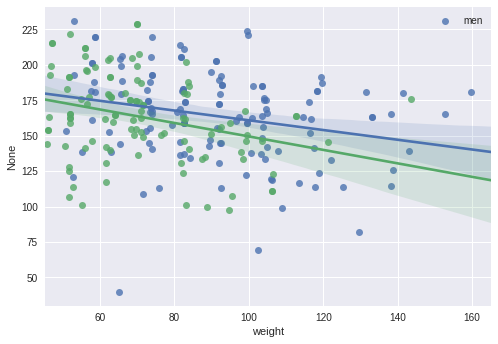

In [72]:
sns.regplot(x, y, label='men')
sns.regplot(w, t)
plt.legend()

In [73]:
print np.corrcoef(x, y)

print np.corrcoef(w, t)

[[ 1.         -0.24922273]
 [-0.24922273  1.        ]]
[[ 1.         -0.30544179]
 [-0.30544179  1.        ]]
